<a href="https://colab.research.google.com/github/rpatel71/Design-Optimization/blob/main/hw2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2(b)

In [7]:
import numpy
from matplotlib import pyplot
from numpy import linalg as la

Taking unconstrained function by substituting x1 = 1 - (2 * x2 + 3 * x3). Here, x[0] is x2 and x[1] is x3.

In [4]:
function = lambda x: (2 - 2*x[0] - 3*x[1])**2 + (x[0])**2 + (x[1] - 1)**2

def grad(x):
  gradient = numpy.array([(10*x[0] + 12*x[1] - 8), (12*x[0] + 20*x[1] - 14)])
  return gradient


Hes = numpy.array([[10,12], [12,20]]) 

Line-search algorithm

In [3]:
def line_search(x):
  t = 0.20
  alpha = 1
  def phi(x, alpha):
    phi = function(x) - t * alpha * numpy.matmul(numpy.transpose(grad(x)), -1*grad(x))
    return phi
  while function(x - alpha * grad(x)):
    alpha = alpha/2
    return alpha

Gradient-descent algorithm

In [5]:
def grad_descent(function, grad, Hes, iterations, x_0):
  x_k = x_0
  # k is current number of iterations.
  k = 0
  g_norm = la.norm(grad(x_0))
  g_norm_data = []
  g_norm_data.append(g_norm)
  resp = []
  resp.append(x_0)
  for x_k in range(k, iterations+1):
    if g_norm> 1e-05:
      alpha = line_search(x_k)
      x_k = x_k - alpha*(grad(x_k))
      resp.append(x_k)
      g_norm = la.norm(grad(x_k))
      g_norm_data.append(g_norm)
      if k == iterations:
        print(f'iterations have surpassed.')
      return resp, g_norm_data, x_k, k
  error_data = []
  for x in range(len(resp)):
    error = abs(function(resp[x]) -  function([-1/7, 11/14]))
    error_data.append(error)
  x1 = 1 - (2*x[0] + 3*x[1])
  print(f'The convergence taken place in {k}')
  print(f'x1 = {x1}, x2 = {x_k[0]} and x3 = {x_k[1]}')
  return x_k, error_data, resp, k

Newton's Method

In [ ]:
def newton_method(function, grad, Hes, iterations, x_0):
  x_k = x_0
  # k is current number of iterations.
  k = 0
  g_norm = la.norm(grad(x_0))
  g_norm_data = []
  g_norm_data.append(g_norm)
  resp = []
  resp.append(x_0)
  for x in range(k, iterations+1):
    if g_norm> 1e-05:
      x_k = x_k - numpy.matmul(la.inv(Hes), grad(x_k))
      resp.append(x_k)
      g_norm = la.norm(grad(x_k))
      g_norm_data.append(g_norm)
      if k == iterations:
        print(f'iterations have surpassed. The error is: {g_norm}')
  return resp, g_norm_data, x_k, k
  error_data = []
  for x in range(len(resp)):
    error = abs(function(resp[x]) -  function([-1/7, 11/14]))
    error_data.append(error)
  x1 = 1 - (2*x[0] + 3*x[1])
  print(f'The convergence taken place in {k}')
  print(f'x1 = {x1}, x2 = {x_k[0]} and x3 = {x_k[1]}')
  return x_k, error_data, resp, k

Plots

TypeError: ignored

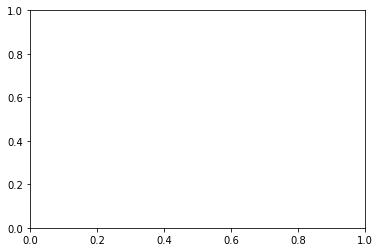

In [9]:
fig, ax = pyplot.subplots()
iterations = 100
x_0 = numpy.array([0, 0])
x_k, error_data, resp, k = grad_descent(function, grad, Hes, iterations, x_0)
print(x_k)
print(error_data)
ax.plot(error_data, k, c='C0')
ax.set_yscale = ("log")